In [93]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\hari2\Downloads\project_dada_39127597.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,ï»¿,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,TOXICITY_x,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic
0,0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0.235235,0,0,0,0,0
1,1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0.085582,0,0,0,0,0
2,2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0.076877,0,0,0,0,0
3,3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0.095684,0,0,0,0,0
4,4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0.165919,0,0,0,0,0


In [94]:
df = df.drop(columns='ï»¿')
df.head()


,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,TOXICITY_x,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic
0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0.235235,0,0,0,0,0
1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0.085582,0,0,0,0,0
2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0.076877,0,0,0,0,0
3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0.095684,0,0,0,0,0
4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0.165919,0,0,0,0,0


In [95]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("Shape of the cleaned data:", df.shape)
df.head()

Shape of the cleaned data: (28818, 17)


,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,TOXICITY_x,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic
0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0.235235,0,0,0,0,0
1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0.085582,0,0,0,0,0
2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0.076877,0,0,0,0,0
3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0.095684,0,0,0,0,0
4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0.165919,0,0,0,0,0


In [96]:
df['Total_toxic_replies'] = df['Num_toxic_direct_replies'] + df['Num_toxic_nested_replies']
print("'Total_toxic_replies' column created successfully.")

'Total_toxic_replies' column created successfully.


In [ ]:
df.describe()

In [97]:
df.Total_toxic_replies

0         0
1         0
2         0
3         0
4         0
         ..
28818     0
28819    10
28820     2
28821     0
28822     0
Name: Total_toxic_replies, Length: 28818, dtype: int64

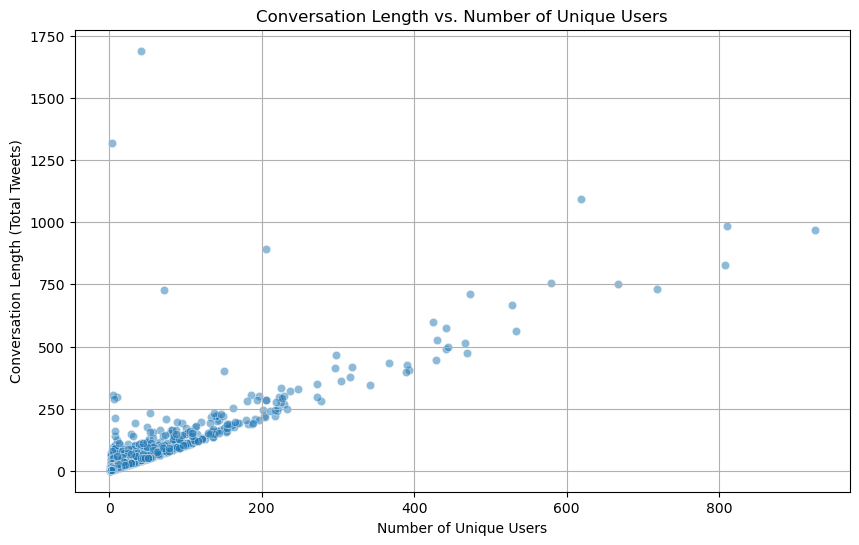

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 7.379e+04
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:39:50   Log-Likelihood:            -1.1964e+05
No. Observations:               28818   AIC:                         2.393e+05
Df Residuals:                   28816   BIC:                         2.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5812      0.094     16.804      0.0

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_users', y='Length', data=df, alpha=0.5)
plt.title('Conversation Length vs. Number of Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('Conversation Length (Total Tweets)')
plt.grid(True)
plt.show()
model1 = smf.ols('Length ~ Num_users', data=df).fit()
print(model1.summary())

  **Coefficients and p-values:** The coefficient for the independent variable, 'Num_users', is **1.2266**. This indicates a positive relationship. For every one-unit increase in the number of unique users ('Num_users'), the conversation 'Length' is expected to increase by approximately 1.23 tweets. The p-value for this coefficient is **0.000**, which is much less than the standard significance level of 0.05. This means the relationship is **statistically significant**.

These results confirm your hypothesis that there is a positive and statistically significant relationship between the number of unique users and the length of the conversation.

 **R-squared Value:** The **R-squared** value is **0.719**. This means that approximately **71.9%** of the variability in the conversation 'Length' is explained by the number of 'Num_users' in the model. This is a very strong model fit and indicates that the number of unique users is a powerful predictor of the total length of a conversation.

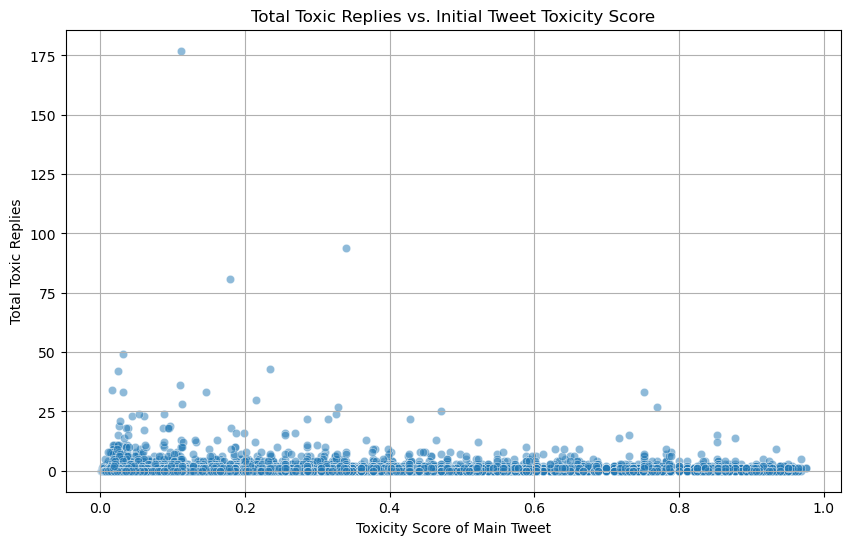

                             OLS Regression Results                            
Dep. Variable:     Total_toxic_replies   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     114.3
Date:                 Fri, 27 Jun 2025   Prob (F-statistic):           1.26e-26
Time:                         20:39:51   Log-Likelihood:                -57894.
No. Observations:                28818   AIC:                         1.158e+05
Df Residuals:                    28816   BIC:                         1.158e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3067      0.014     21.44

In [99]:
# 2a: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOXICITY_x', y='Total_toxic_replies', data=df, alpha=0.5)
plt.title('Total Toxic Replies vs. Initial Tweet Toxicity Score')
plt.xlabel('Toxicity Score of Main Tweet')
plt.ylabel('Total Toxic Replies')
plt.grid(True)
plt.show()
# Dependent Variable (Y)is  Total_toxic_replies
# Independent Variable (X) is  Toxicity
model2 = smf.ols('Total_toxic_replies ~ TOXICITY_x', data=df).fit()
print(model2.summary())

###  Hypothesis 2

* **Coefficients and p-values:** The coefficient for the independent variable, 'TOXICITY_x', is **0.5249**. This shows a positive relationship. For every one-unit increase in the toxicity score of the original tweet, the number of 'Total_toxic_replies' is expected to increase by approximately 0.52. The p-value for this coefficient is **0.000**, which is much lower than 0.05. This indicates that the relationship is **statistically significant**.

    This finding supports your hypothesis that conversations starting with a higher toxicity score are indeed more likely to receive toxic replies.

* **R-squared Value:** The **R-squared** value for this model is **0.004**. This means that only **0.4%** of the variability in the total number of toxic replies is explained by the toxicity score of the initial tweet. While the relationship is statistically significant, the very low R-squared value indicates a weak model fit. This suggests that while the initial tweet's toxicity is a significant factor, it is only a very small piece of the puzzle, and many other variables influence the number of toxic replies a conversation receives.

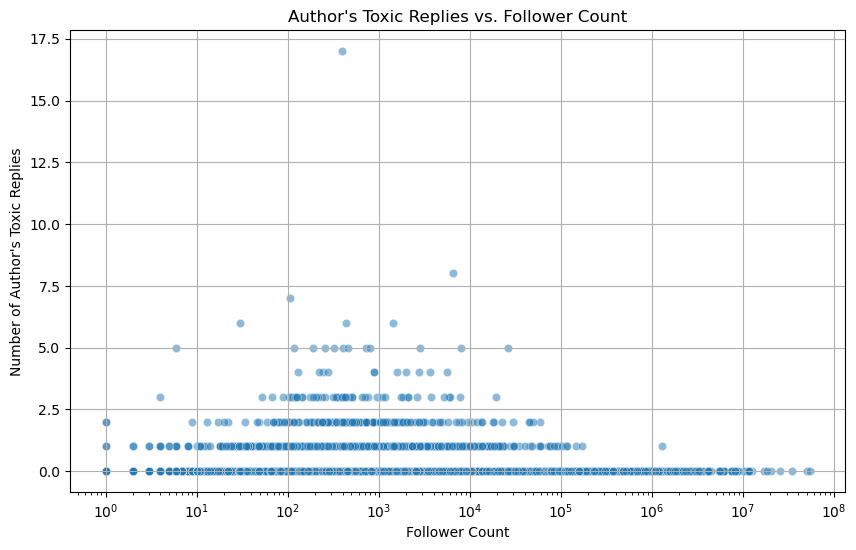

                               OLS Regression Results                               
Dep. Variable:     Num_author_toxic_replies   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     2.493
Date:                      Fri, 27 Jun 2025   Prob (F-statistic):              0.114
Time:                              20:39:54   Log-Likelihood:                -8972.6
No. Observations:                     28818   AIC:                         1.795e+04
Df Residuals:                         28816   BIC:                         1.797e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [100]:
# 3a: Visualize the relationship
plt.figure(figsize=(10, 6))
# Using a log scale for followers due to wide distribution
sns.scatterplot(x='Followers', y='Num_author_toxic_replies', data=df, alpha=0.5)
plt.title("Author's Toxic Replies vs. Follower Count")
plt.xlabel('Follower Count')
plt.ylabel("Number of Author's Toxic Replies")
plt.xscale('log') # Log scale for better visualization of followers
plt.grid(True)
plt.show()
# Dependent Variable (Y): Num_author_toxic_replies
# Independent Variable (X): Followers
model3 = smf.ols('Num_author_toxic_replies ~ Followers', data=df).fit()
print(model3.summary())



### Hypothesis 3

* **Coefficients and p-values:** The coefficient for the independent variable, 'Followers', is **-5.003e-09**, which is an extremely small negative number (effectively zero). This suggests that having more followers has a negligible, and slightly negative, effect on the number of toxic replies an author makes. Most importantly, the **p-value** for this coefficient is **0.114**. Since this value is greater than the standard significance threshold of 0.05, the relationship is **not statistically significant**.

    Based on this result, we fail to support the hypothesis. The data does not show a statistically significant relationship between a user's follower count and the number of toxic replies they post.

* **R-squared Value:** The **R-squared** value is **0.000**. This indicates that the number of followers explains **0%** of the variance in the number of toxic replies made by the author. This confirms that follower count is not a useful predictor for this behavior, and the model has no explanatory power.

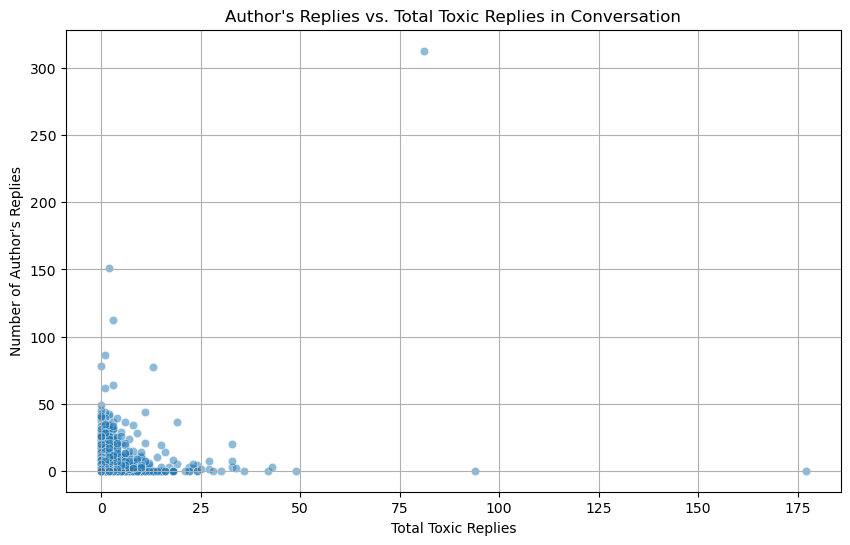

                            OLS Regression Results                            
Dep. Variable:     Num_author_replies   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     297.2
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:39:55   Log-Likelihood:                -76496.
No. Observations:               28818   AIC:                         1.530e+05
Df Residuals:                   28811   BIC:                         1.531e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4591    

In [101]:
# 4a: Visualize the main relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_toxic_replies', y='Num_author_replies', data=df, alpha=0.5)
plt.title("Author's Replies vs. Total Toxic Replies in Conversation")
plt.xlabel('Total Toxic Replies')
plt.ylabel("Number of Author's Replies")
plt.grid(True)
plt.show()
formula4 = 'Num_author_replies ~ Total_toxic_replies + Followers + Friends + Num_tweets + Listed_count + Age'
model4 = smf.ols(formula4, data=df).fit()
print(model4.summary())



###  Hypothesis 4

* **Coefficients and p-values:**
     The primary independent variable, **'Total_toxic_replies'**, has a positive coefficient of **0.4505**. This means that for each additional toxic reply in a conversation, the original author's number of replies is expected to increase by about 0.45, holding all other factors constant. The p-value for this variable is **0.000**, which makes this a **highly statistically significant** relationship. This result supports your hypothesis.
* **Control Variables:** When looking at the user-level characteristics, 'Listed_count' (p=0.016) and 'Age' (p=0.000) both have a small, negative, and statistically significant effect on the number of replies. 'Followers' (p=0.877), 'Friends' (p=0.995), and 'Num_tweets' (p=0.070) are not statistically significant predictors in this model.

* **R-squared Value:** The **R-squared** value for this model is **0.058**. This indicates that approximately **5.8%** of the variability in the number of replies from the author ('Num_author_replies') is explained by all the variables in the model combined. This is considered a weak model fit, suggesting that while the number of toxic replies is a significant factor, the included variables together do not explain most of the reasons why an author chooses to reply in a conversation.

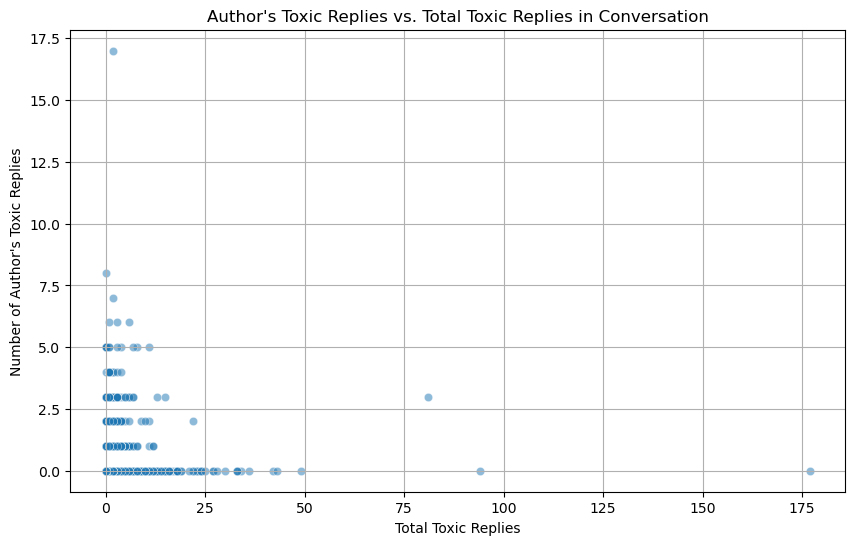

                               OLS Regression Results                               
Dep. Variable:     Num_author_toxic_replies   R-squared:                       0.014
Model:                                  OLS   Adj. R-squared:                  0.014
Method:                       Least Squares   F-statistic:                     69.29
Date:                      Fri, 27 Jun 2025   Prob (F-statistic):           4.88e-86
Time:                              20:39:56   Log-Likelihood:                -8767.4
No. Observations:                     28818   AIC:                         1.755e+04
Df Residuals:                         28811   BIC:                         1.761e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [102]:
# 5a: Visualize the main relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_toxic_replies', y='Num_author_toxic_replies', data=df, alpha=0.5)
plt.title("Author's Toxic Replies vs. Total Toxic Replies in Conversation")
plt.xlabel('Total Toxic Replies')
plt.ylabel("Number of Author's Toxic Replies")
plt.grid(True)
plt.show()
# Control Variables are  Followers, Friends, Num_tweets, Listed_count, Age
formula5 = 'Num_author_toxic_replies ~ Total_toxic_replies + Followers + Friends + Num_tweets + Listed_count + Age'
model5 = smf.ols(formula5, data=df).fit()
print(model5.summary())



###  Hypothesis 5

* **Coefficients and p-values:**
    * The primary independent variable, **'Total_toxic_replies'**, has a positive coefficient of **0.0194**. This indicates that as the total number of toxic replies in a conversation increases by one, the original author's number of *toxic* replies is expected to increase by 0.0194. Although the effect is small, the **p-value** is **0.000**, making this relationship **statistically significant**. This result supports your hypothesis.
* **Control Variables:** Among the control variables, only "Age" (p=0.000) shows a statistically significant relationship, having a very small negative effect. The other variables, 'Followers' (p=0.811), 'Friends' (p=0.379), 'Num_tweets' (p=0.082), and 'Listed_count' (p=0.236), are not statistically significant predictors of the author's toxic replies in this model.

* **R-squared Value:** The **R-squared** value is **0.014**. This means that only **1.4%** of the variability in the number of toxic replies from the author is explained by the combination of total toxic replies and the user-level control variables. This is a very weak model fit. While the number of toxic replies in the conversation is a statistically significant predictor, the model as a whole has very little explanatory power.